<a href="https://colab.research.google.com/github/Beta628427/Tesis/blob/master/2_Beta___Cod/Beta_PCA/PCA_Cod_master_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODIGO MASTER PCA _ BETA

## En escodigo encontraremos PCA aplicado a los datos mmc3

__ Versión 1.0 __

In [0]:
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Autoriza Drive_BETA
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [62]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
#
sh            = gc.open('mmc3')                   # Abro documento 
worksheet     = sh.worksheet("Joint Rotations")   # Entro a la pestaña de Excel
rows          = worksheet.get_all_values()        # Saco todos los valores
df            = pd.DataFrame.from_records(rows)   # Guardo en una tabla panda
#
targets                       = df.iloc[0,:]
targets                       = pd.DataFrame(targets[np.newaxis,:])
Pelvic_Ant_Posterior_Tilt     = np.concatenate((np.array(targets),np.array(df.iloc[1:102,:])),axis=0)
# creo X
# concateno de 0-100% con los valores q deseo graficar como coordenadas X
X1 = np.concatenate((np.array(df.iloc[1:102,[1]]),np.array(df.iloc[1:102,[6]])), axis=1)
X2 = np.concatenate((np.array(df.iloc[1:102,[1]]),np.array(df.iloc[1:102,[33]])),axis=1)
pd.DataFrame(X1)
X  = np.concatenate((X1,X2),axis=0)
pd.DataFrame(X)
# creo Y
Y = []
for i in range(X1.shape[0]):
  Y.append(int(0))
for i in range(X2.shape[0]):
  Y.append(int(1))
#
Y = np.array(Y)
print(pd.DataFrame(Y)[0])
#
print(type(X))
print(type(Y))


0      0
1      0
2      0
3      0
4      0
      ..
197    1
198    1
199    1
200    1
201    1
Name: 0, Length: 202, dtype: int64
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
X = np.array(X)
Y = Y[:, np.newaxis]

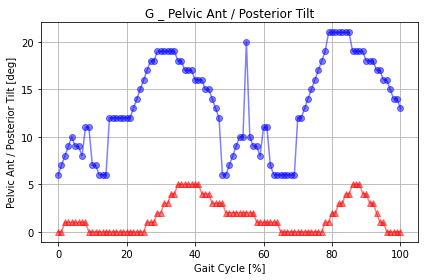

In [64]:
plt.plot(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], color='red',  marker='^', alpha=0.5) # jovenes
plt.plot(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], color='blue', marker='o', alpha=0.5) # viejos
plt.grid(True)
plt.title("G _ Pelvic Ant / Posterior Tilt")
plt.xlabel("Gait Cycle [%]")
plt.ylabel("Pelvic Ant / Posterior Tilt [deg]")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.decomposition import PCA
#
pca=PCA(n_components=2)
pca.fit(X)
#
transformada=pca.transform(X)

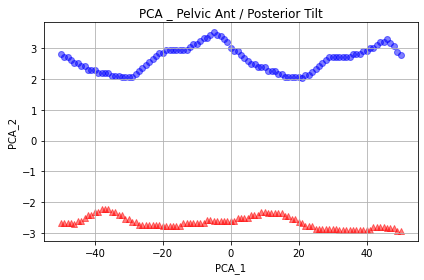

In [66]:
plt.scatter(transformada[Y[:,0] == 0,0],transformada[Y[:,0] == 0,1], color='red',  marker='^', alpha=0.5) 
plt.scatter(transformada[Y[:,0] == 1,0],transformada[Y[:,0] == 1,1], color='blue', marker='o', alpha=0.5) 
plt.grid(True)
plt.title("PCA _ Pelvic Ant / Posterior Tilt")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()